                                          Luis Castaño  Analisis de Datos                                                                 

In [ ]:
#Primero importamos las librerias a trabajar
import pandas as pads #type: ignore Se utiliza para el manejo y análisis de estructuras de datos
import numpy as np #type: ignore Se usara para póder realizar el cálculo numérico y el análisis de datos
import seaborn as sns #type: ignore Esta libreria nos permite o se usa para la Creación gráficos estadísticos
import matplotlib.pyplot as plt #type: ignore Con está libreria se realiza la creación de gráficos en dos dimensiones
import plotly.io as pio #type: ignore
pio.renderers.default = 'browser' 
import plotly.graph_objs as go #type: ignore Con está libreria se puede crear gráficos en tres dimensiones
import plotly.express as px #type: ignore Esta libreria nos permite crear gráficos en tres dimensiones

#Carga de información mediante selección en este caso from que seria de y se hace la importación
from sklearn.cluster import KMeans #type: ignore
from sklearn.cluster import AgglomerativeClustering #type: ignore 
from sklearn.preprocessing import StandardScaler #type: ignore 
from sklearn import metrics #type: ignore 
from scipy.cluster.hierarchy import dendrogram, linkage #type: ignore 
from scipy.cluster.hierarchy import cophenet #type: ignore 
from scipy.spatial.distance import pdist #type: ignore 
import warnings
warnings.filterwarnings('ignore') #Se pueden agregar reglas al filtro mediante una llamada filterwarnings y se le da el parametro de ignorar

In [146]:
# Cargamos el excel y la data set para analizarlo, ajustarlo y poder obtener los datos para generar los graficos y demás
df = pads.read_csv('Mall_Customers.csv')

                                   Evaluación Explorativa de Datos                                                      

In [147]:
df.head(10) #Se obtienen los datos del excel

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Existen 5 variables: CustomerID, Gender, Age, Annual Income (k$) y Spending Score (1-100)

In [148]:
# Información estadística descriptiva de variables numéricas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [149]:
# Detalles acerca de los tipos de datos y los valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


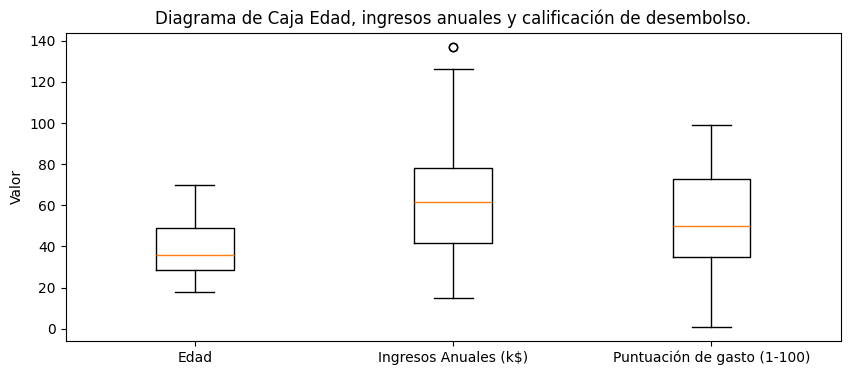

In [150]:
#Reconocimiento de Datos Ausentes (No existen) y Atípicos
#Diagramas de caja para identificar valores atípicos en las variables comprendidas entre 0 y 16
plt.figure(figsize=(10, 4))
plt.boxplot([df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']], 
        labels=['Edad', 'Ingresos Anuales (k$)', 'Puntuación de gasto (1-100)'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja Edad, ingresos anuales y calificación de desembolso.')
plt.show()

Solo se presenta valores atípicos en los ingresos anuales, para lo que se elaboró el diagrama de cajas únicamente para los ingresos anuales.

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [151]:
# Identificar los valores ausentes en el DataFrame.
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [152]:
# Se comprueba la presencia de registros duplicados.
print(f' Cantidad de registros duplicados es: ', df.duplicated().sum())

 Cantidad de registros duplicados es:  0


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Para este modelo se utilizarán las características de: Age (Edad) Annual Income (k$) (Ingresos anuales) Spending Score (1-100) (Puntuación de Gasto)

In [153]:
# Se elimina y se realiza el filtro a las columnas a trabajar
df_filtrado = df.drop(['Gender', 'CustomerID'], axis=1)

In [154]:
# Se realiza la verificación de las variables a trabajar en el modelo
df_filtrado.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [155]:
# Se identifican las relaciones que existen entre las variables
print(df_filtrado.corr())

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


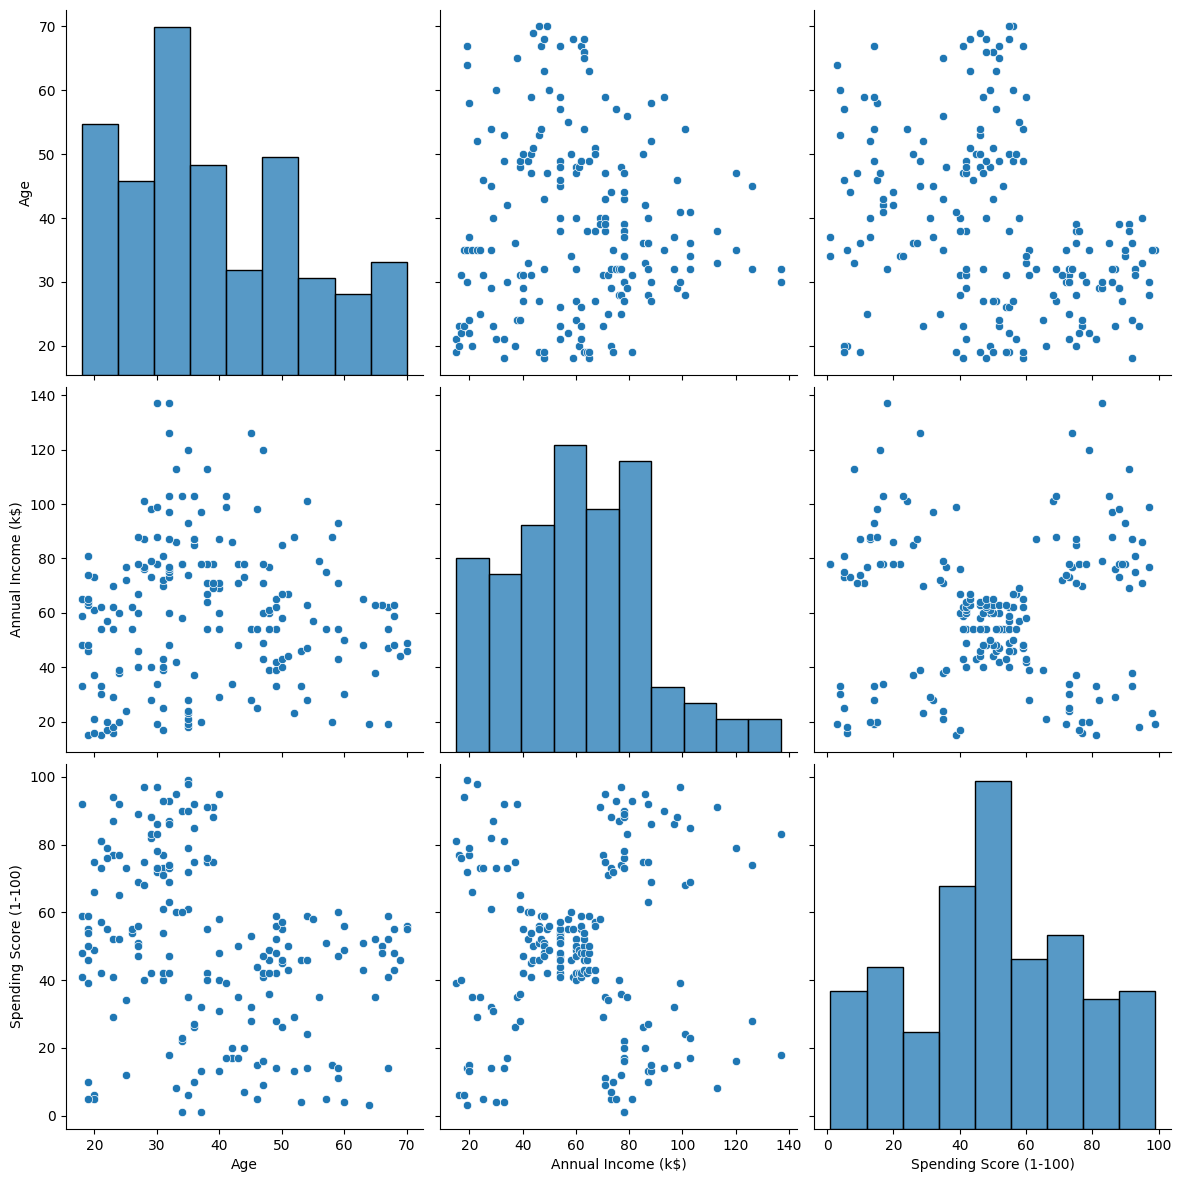

In [156]:
# Se realiza la grafica correspondiente a esas relaciones
sns.pairplot(df_filtrado, size=4, kind='scatter')

4. Entrenar el modelo - Hierarchical Clustering

In [157]:
# Antes de implementar el Clustering Hierárquico, es necesario estandarizar los datos.
scal = StandardScaler()
X = pads.DataFrame(scal.fit_transform(df_filtrado), columns = df_filtrado.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


200 rows × 3 columns

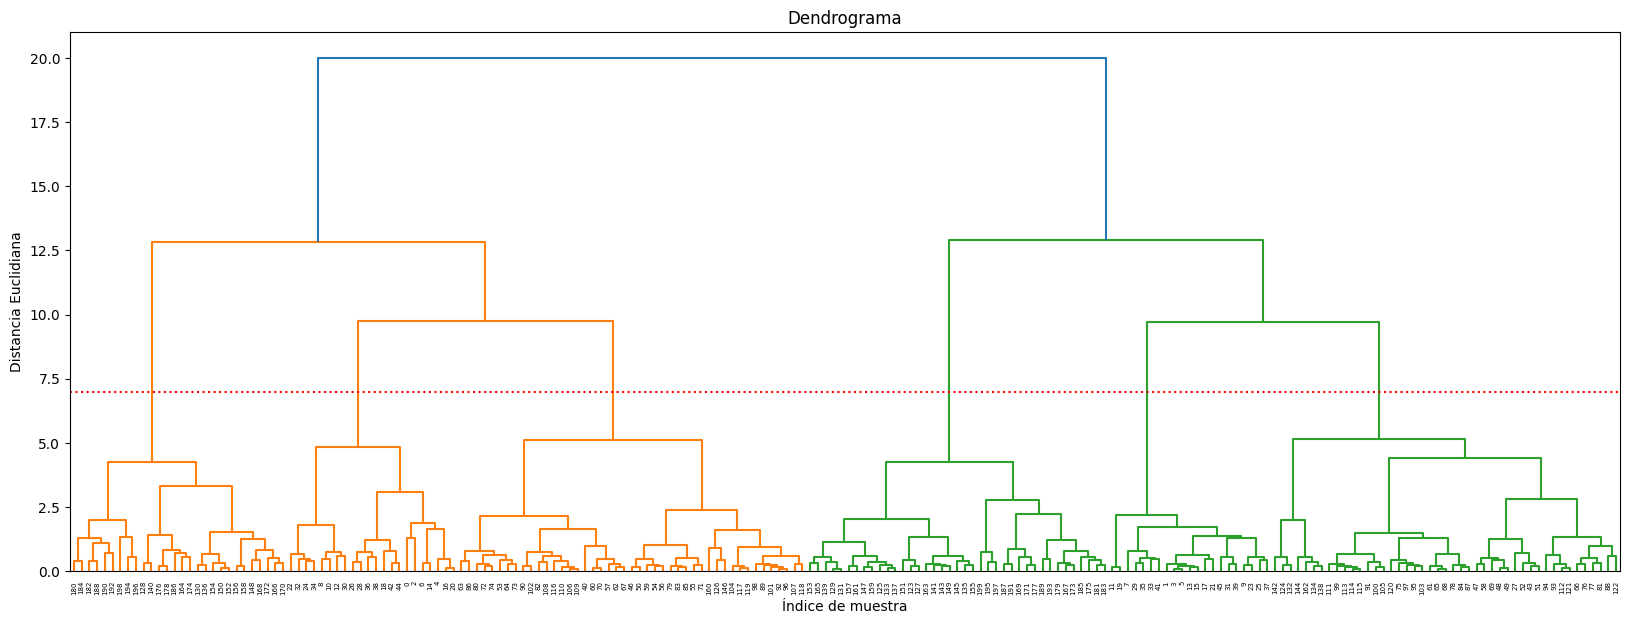

In [158]:
# Establecer la cantidad de grupos a emplear a través del dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 7, color = 'r', linestyle = ':')
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

"Al examinar el dendograma, es posible detectar los incrementos más notables en la altura de las uniones en las alturas de entre 5 y 10 unidades, por lo que se dibujó la línea horizontal a la altura de 7 unidades, observando que esta intersecta 6 líneas verticales, lo que indica que este es el número ideal de uniones para entrenar el modelo."

In [159]:
# Se establece el modelo de agrupación con 6 agrupaciones, se modifica y se lleva a cabo la predicción de las etiquetas.
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Text(0, 0.5, 'Media índices silhouette')

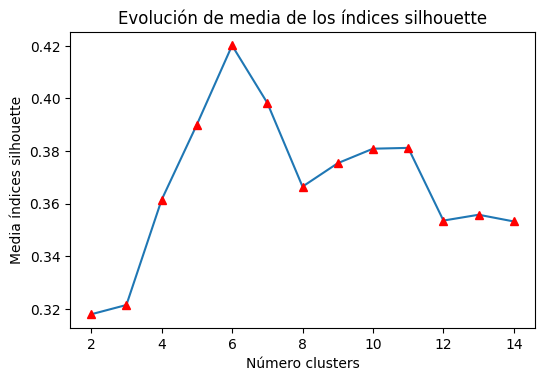

In [160]:
# Método silhouette para identificar el número óptimo de clusters

# Se inicializan variables
mejorModeloH = None
mejorSilueta = 0

range_n_clusters = range(2, 15) # Intervalo de valores para los grupos n_clusters
resultados = [] # Lista para guardar los resultados obtenidos


# Ciclo para analizar el modelo con diversos valores de clúster.
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    
     # Determinar métricas de calidad para el modelo.

    puntaje_silueta = metrics.silhouette_score(X, cluster_labels)
    indice_calinski_harabasz = metrics.calinski_harabasz_score(X, cluster_labels)
    indice_davies_bouldin = metrics.davies_bouldin_score(X, cluster_labels)

    resultados.append({
        'Clusters': n_clusters,
        'Silhouette': puntaje_silueta,
        'Calinski-Harabasz': indice_calinski_harabasz,
        'Davies-Bouldin': indice_davies_bouldin
    })
       
    # Condicional para conservar el modelo más destacado.
    if puntaje_silueta > mejorSilueta:
        mejorSilueta = puntaje_silueta
        mejorModeloH = modelo

# Elaborar un DataFrame que contenga los resultados obtenidos
resultados_df = pads.DataFrame(resultados)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, resultados_df['Silhouette'], marker='^', markerfacecolor='red', markeredgecolor='red')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

Según los hallazgos, el modelo más adecuado consta de 6 clusters, detectados en el Dendograma y mediante los índices de silhouette.

In [161]:
#Se establece el modelo de agrupación con 6 clusters, se modifica y se lleva a cabo la predicción de las etiquetas.
#Se selecciona el modelo más adecuado del ciclo de evaluación llevado a cabo en el ciclo previo.

labels_hier = mejorModeloH.fit_predict(X)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

                            Evaluar el modelo                                          
Primero, para evaluar el modelo, asigno las métricas para el modelo más óptimo (6 cluster) podemos emplear los resultados del ciclo que se llevó a cabo para establecer el número clusters, dado que en ese lugar se generó una lista que alberga los resultados de cada uno.                                   

In [162]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print('Número de observaciones: ', len(df))
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Número de observaciones:  200
Puntaje de silueta: 0.4201169558789579
Índice de Calinski-Harabasz: 127.98645433956887
Davies-Bouldin Index: 0.8521020845733146


Contraste del modelo con distintos números de Clusters

In [163]:
print(resultados_df) # Se realiza la impresión de los resultados

    Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0          2    0.317957          99.000668        1.308296
1          3    0.321489          88.101741        1.127729
2          4    0.361451         102.019399        1.016382
3          5    0.390028         107.826560        0.916289
4          6    0.420117         127.986454        0.852102
5          7    0.398295         120.686805        0.851329
6          8    0.366479         118.066796        0.841587
7          9    0.375385         117.475123        0.858235
8         10    0.380889         117.221895        0.885471
9         11    0.381198         118.548799        0.921740
10        12    0.353572         122.381270        0.979342
11        13    0.355790         121.943615        0.948789
12        14    0.353230         121.436643        0.949264


In [164]:
# Se realiza el calculo de coeficiente de correlación
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (np.float64(0.6261774947075186), array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))


Es evidente que hay una correlación moderada entre las distancias iniciales y las reflejadas en el dendograma, lo que señala que el dendograma es aceptable respecto a la reprentación efectuada, ya que el valor ideal es 1 y se alcanzó alrededor de 0,63.

Realizar las gráficas que visualizan los resultados del modelo.

    Grafico cada una de las posibles relaciones para verificar su agrupamiento

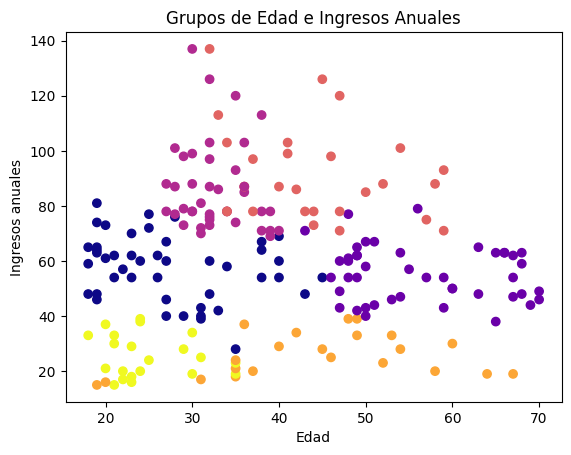

In [165]:
# Se Crea el scatter plot para los puntos
scatter = plt.scatter(df_filtrado['Age'], df_filtrado['Annual Income (k$)'], c=labels_hier, cmap='plasma')

plt.xlabel('Edad')
plt.ylabel('Ingresos anuales')
plt.title('Grupos de Edad e Ingresos Anuales')
plt.show()

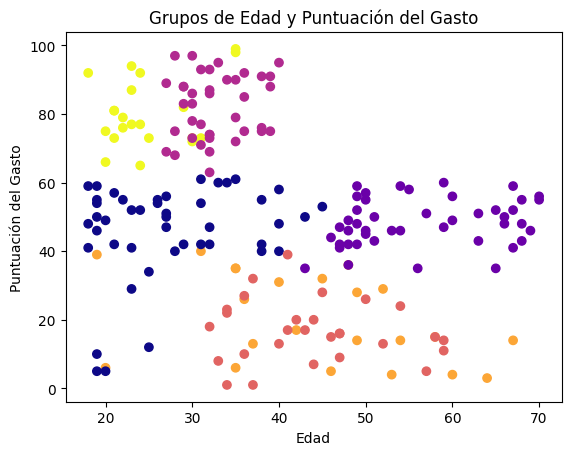

In [166]:
#Visualizo cada una de las relaciones potenciales para confirmar su agrupación.

#Elaborar el argumento de dispersión para los puntos.

plt.scatter(df_filtrado['Age'], df_filtrado['Spending Score (1-100)'], c=labels_hier, cmap='plasma')
plt.xlabel('Edad')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Edad y Puntuación del Gasto')
plt.show()

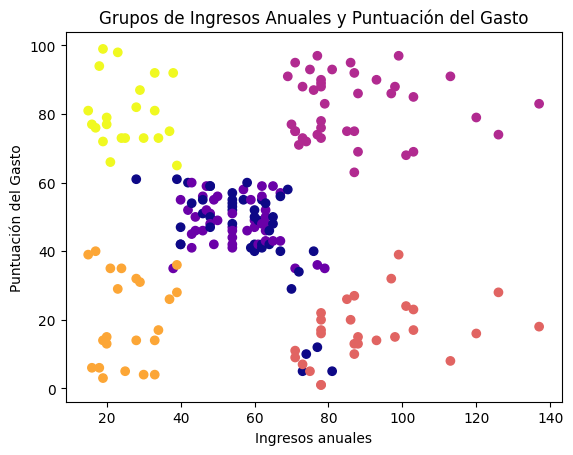

In [167]:
# Grafico cada una de las posibles relaciones para verificar su agrupamiento

# Crear el scatter plot para los puntos
plt.scatter(df_filtrado['Annual Income (k$)'], df_filtrado['Spending Score (1-100)'], c=labels_hier, cmap='plasma')

plt.xlabel('Ingresos anuales')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Ingresos Anuales y Puntuación del Gasto')
plt.show()

In [168]:
# Se realiza un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(df_filtrado, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=labels_hier, symbol=labels_hier, symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de Hierarchical con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

Entrenar el modelo para Aplicar K-Means

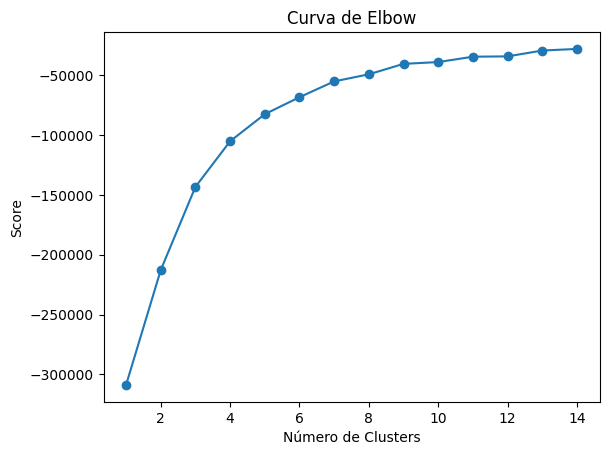

In [169]:
#Establecer la cantidad de clusters a emplear a través del gráfico de codo.

NumClust = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in NumClust]
kmeans
score = [kmeans[i].fit(df_filtrado).score(df_filtrado) for i in range(len(kmeans))]
score
plt.plot(NumClust, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de Elbow')
plt.show()

In [171]:
#Se reconoce la curva con la variación ideal hasta el número 5 al 8 de clusters.
#Por lo tanto, se capacita el modelo con estos números de agrupación para determinar cuál es el más adecuado.

# Lista de datos para los grupos n_clusters
n_clusters_list = [5, 6, 7, 8]

# Lista para guardar los resultados obtenidos
resultados = []

# Se inicializan variables
mejorModeloK = None
mejorSilueta = 0

# Ciclo para analizar el modelo con diversos valores de clúster
for i in n_clusters_list:
    modeloK = KMeans(n_clusters=i, random_state=0)
    modeloK.fit(df_filtrado)
    df_filtrado["Categoria"] = modeloK.labels_
    
    Observaciones = len(df_filtrado)
    X = df_filtrado.drop('Categoria', axis=1)
    clusters = df_filtrado['Categoria']
    
    # Calcular medidas de calidad para K-Means
    puntaje_silueta = metrics.silhouette_score(X, clusters)
    indice_calinski_harabasz = metrics.calinski_harabasz_score(X, clusters)
    indice_davies_bouldin = metrics.davies_bouldin_score(X, clusters)

    # Condicional para elegir mejor número de clusters
    if puntaje_silueta > mejorSilueta:
        mejorModeloK = modeloK
        mejorSilueta = puntaje_silueta
    
    # Guardar los resultados en la lista
    resultados.append({
        'Clusters': i,
        'Silhouette': puntaje_silueta,
        'Calinski-Harabasz': indice_calinski_harabasz,
        'Davies-Bouldin': indice_davies_bouldin
    })

# Elaborar un DataFrame que contenga los resultados obtenidos
resultados_df = pads.DataFrame(resultados)

# Mostrar la tabla de resultados
print(resultados_df)

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         5    0.377111         133.490300        0.984547
1         6    0.450951         166.585711        0.751533
2         7    0.437513         160.602722        0.830779
3         8    0.426275         163.591968        0.863855


Según los hallazgos, el modelo más adecuado es el que cuenta con 6 clusters.

In [172]:
mejorModeloK.labels_
df_filtrado["Categoria"] = mejorModeloK.labels_ 
print (df_filtrado)

     Age  Annual Income (k$)  Spending Score (1-100)  Categoria
0     19                  15                      39          5
1     21                  15                      81          2
2     20                  16                       6          5
3     23                  16                      77          2
4     31                  17                      40          5
..   ...                 ...                     ...        ...
195   35                 120                      79          1
196   45                 126                      28          3
197   32                 126                      74          1
198   32                 137                      18          3
199   30                 137                      83          1

[200 rows x 4 columns]


Evaluar el modelo

In [173]:
# Preparación de la metrica de la columna Grupo
Observaciones = len(df_filtrado)
X = df_filtrado.drop('Categoria', axis=1)
clusters = df_filtrado['Categoria']

# Calcular medidas de calidad para K-Means
print('Medidas de calidad para K-Means:')
print('Número de observaciones: ', len(df))
print('Puntaje de silueta; ', metrics.silhouette_score(X, clusters))
print('Índice de Calinski-Harabasz: ', metrics.calinski_harabasz_score(X, clusters))
print('Indice de Davies-Bouldin: ', metrics.davies_bouldin_score(X, clusters)) 

Medidas de calidad para K-Means:
Número de observaciones:  200
Puntaje de silueta;  0.45095124469943243
Índice de Calinski-Harabasz:  166.5857109469557
Indice de Davies-Bouldin:  0.7515325100425702


In [174]:
# Obtener las coordenadas de los centroides
C = mejorModeloK.cluster_centers_
print(C)

[[56.34090909 53.70454545 49.38636364  1.36363636]
 [32.69230769 86.53846154 82.12820513  1.        ]
 [25.52173913 26.30434783 78.56521739  2.        ]
 [41.64705882 88.73529412 16.76470588  3.        ]
 [27.31578947 57.5        48.44736842  4.        ]
 [44.31818182 25.77272727 20.27272727  0.09090909]]


Visualizo cada una de las relaciones potenciales para confirmar su agrupación.

In [175]:
# Función para los colores de los centroides
def colorCentroides(df, centers, scatter):
    
    # Obtener el colormap 'viridis'
    cmap = plt.cm.get_cmap('viridis')

    # Obtener los colores únicos de las categorías
    cu = df_filtrado['Categoria'].unique()
    colores = [cmap(i / len(cu)) for i in range(len(cu))]

    # Crear el scatter plot para los centros usando los colores del colormap
    for i, centro in enumerate(C):
        plt.scatter(centro[0], centro[1], marker='+', color=colores[i], s=100)

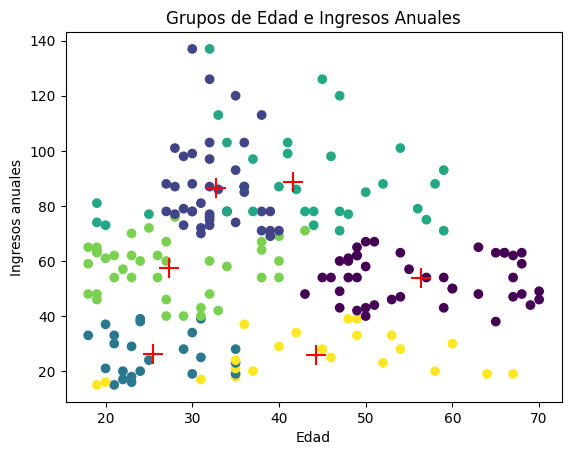

In [176]:
# Elaborar el scatter plot para los puntos
scatter = plt.scatter(df_filtrado['Age'], df_filtrado['Annual Income (k$)'], c=df_filtrado['Categoria'], cmap='viridis')

# Llamamos la función para asignar colores a los centroides
colorCentroides(df_filtrado, C, scatter)

plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales')
plt.title('Grupos de Edad e Ingresos Anuales')
plt.show()

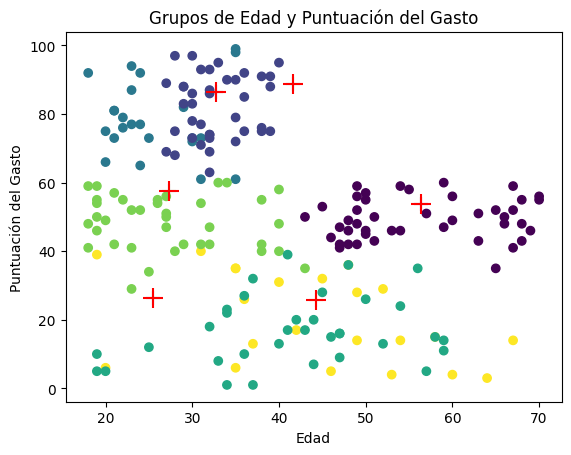

In [177]:
#Visualizo cada una de las relaciones potenciales para confirmar su agrupación.

#Elaborar el argumento de dispersión para los puntos.
plt.scatter(df_filtrado['Age'], df_filtrado['Spending Score (1-100)'], c=df_filtrado['Categoria'], cmap='viridis')

# Llamamos la función para asignar colores a los centroides
colorCentroides(df_filtrado, C, scatter)

plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Edad')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Edad y Puntuación del Gasto')
plt.show()

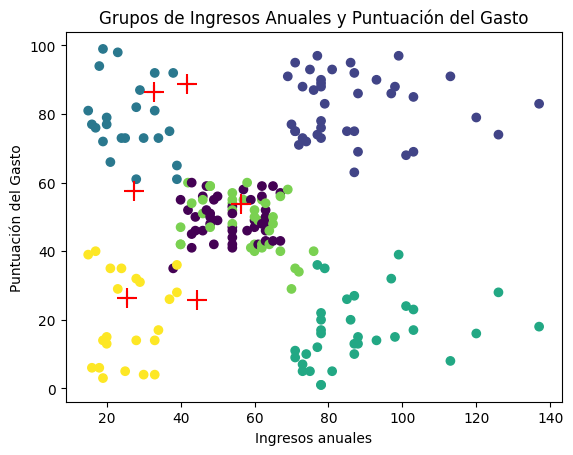

In [178]:
# Grafico cada una de las posibles relaciones para verificar su agrupamiento

# Crear el scatter plot para los puntos
plt.scatter(df_filtrado['Annual Income (k$)'], df_filtrado['Spending Score (1-100)'], c=df_filtrado['Categoria'], cmap='viridis')

# Llamamos la función para asignar colores a los centroides
colorCentroides(df_filtrado, C, scatter)

plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Ingresos anuales')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Ingresos Anuales y Puntuación del Gasto')
plt.show()